In [35]:
from os.path import join

import earthaccess

import geopandas as gpd
import rasters as rt

from EMITL2ARFL import *

date range

In [2]:
start_date = "2023-04-01"
end_date = "2023-06-01"

download directory

In [3]:
download_directory = "~/data/EMIT_download"

output directory

In [19]:
output_directory = "~/data/Kings Canyon EMIT"

Upper Kings area of interest

In [4]:
gdf = gpd.read_file("upper_kings.kml")
gdf

,Name,Description,geometry
0,0,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-118.75179 36.85601 0, -118...."


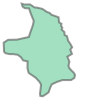

In [5]:
gdf.geometry[0]

In [6]:
bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox
bbox_UTM

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_93872/4116591760.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox


BBox(xmin=343776.99999338, ymin=4050631.999999944, xmax=381105.99999904167, ymax=4111651.9999999665, crs="EPSG:32611")

In [7]:
grid = rt.RasterGrid.from_bbox(bbox_UTM, cell_size=60, crs=bbox_UTM.crs)
grid

{
  "dimensions": {
    "rows": 1017,
    "cols": 622
  },
  "bbox": {
    "xmin": 343776.99999338,
    "ymin": 4050631.9999999665,
    "xmax": 381096.99999338,
    "ymax": 4111651.9999999665
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 60.0,
    "cell_height": -60.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [8]:
earthaccess.login(strategy="netrc", persist=True)

search for EMIT granules covering area of interest

In [9]:
search_results = search_EMIT_L2A_RFL_granules(
    start_UTC=start_date,
    end_UTC=end_date,
    geometry=grid
)

search_results

[Collection: {'ShortName': 'EMITL2ARFL', 'Version': '001'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -119.02839660644531, 'Latitude': 37.37525939941406}, {'Longitude': -119.491455078125, 'Latitude': 36.722076416015625}, {'Longitude': -118.73031616210938, 'Latitude': 36.18247985839844}, {'Longitude': -118.26725769042969, 'Latitude': 36.835662841796875}, {'Longitude': -119.02839660644531, 'Latitude': 37.37525939941406}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-04-15T22:24:20Z', 'EndingDateTime': '2023-04-15T22:24:32Z'}}
 Size(MB): 3582.072193145752
 Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20230415T222420_2310515_007/EMIT_L2A_RFL_001_20230415T222420_2310515_007.nc', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/EMITL2ARFL.001/EMIT_L2A_RFL_001_20230415T222420_2310515_007/EMIT_L2A_RFLUNCERT_001_20230415T222420_2

download each granule, extract subset projected to target grid, and write to multi-band GeoTIFF

In [36]:
for search_result in search_results:
    granule_ID = dict(search_result.items())["meta"]["native-id"]
    print(granule_ID)
    output_filename = join(output_directory, f"{granule_ID}.tif")
    granule = retrieve_EMIT_L2A_RFL_granule(search_result)
    reflectance = granule.reflectance(geometry=grid)
    print(output_filename)
    reflectance.to_geotiff(output_filename)

EMIT_L2A_RFL_001_20230415T222420_2310515_007


QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_001_20230415T222420_2310515_007.tif
EMIT_L2A_RFL_001_20230415T222432_2310515_008


/Users/halverso/Projects/rasters/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))


QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_001_20230415T222432_2310515_008.tif
EMIT_L2A_RFL_001_20230423T191045_2311313_008


/Users/halverso/Projects/rasters/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))


QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_001_20230423T191045_2311313_008.tif
EMIT_L2A_RFL_001_20230528T220455_2314815_007


/Users/halverso/Projects/rasters/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))


QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

~/data/Kings Canyon EMIT/EMIT_L2A_RFL_001_20230528T220455_2314815_007.tif


/Users/halverso/Projects/rasters/rasters/multi_raster.py:251: RuntimeWarning: invalid value encountered in cast
  pillow_image = PIL.Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2) * 255))
